In [26]:
import numpy as np
import plotly.graph_objects as go

def plot_series_pretty(x_values, series_list, labels_list):
    fig = go.Figure()

    dash_styles = ['solid', 'dash', 'dot', 'dashdot']
    
    # Add each series to the plot
    for i, (series, label) in enumerate(zip(series_list, labels_list)):
        fig.add_trace(go.Scatter(
            x=x_values, 
            y=series, 
            mode='lines', 
            name=label,
            line=dict(
                dash=dash_styles[i % len(dash_styles)],
                width=2.5 if i == 0 else 2 # Slight width difference helps visibility
            )
        ))

    # Configure the theme and background color
    fig.update_layout(
        paper_bgcolor='#010f2e',
        plot_bgcolor='#010f2e',
        font=dict(color='white'),
        xaxis=dict(
            title="x",
            gridcolor='#1e293b',  # Subtle grid lines
            zerolinecolor='white'
        ),
        yaxis=dict(
            title="y",
            gridcolor='#1e293b',
            zerolinecolor='white',
            zerolinewidth=.5
        ),
        legend=dict(
            font=dict(color='white'),
            bgcolor='rgba(0,0,0,0)'
        )
    )
    
    return fig

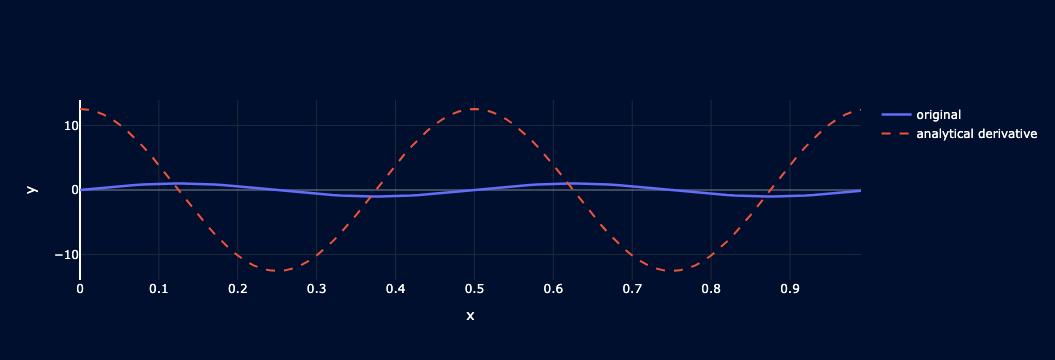

In [27]:

L = 1
N = 100

# IMPORTANT: The right boundary point is not included in the mesh!
mesh = np.linspace(0, L, N, endpoint=False)

f = lambda x: np.sin(4 * np.pi * x)
f_prime = lambda x: 4 * np.pi * np.cos(4 * np.pi * x)


f_h = f(mesh)
f_prime_h = f_prime(mesh)

fig = plot_series_pretty(
    x_values=mesh, 
    series_list=[f_h, f_prime_h], 
    labels_list=["original", "analytical derivative"]
)

fig.show()


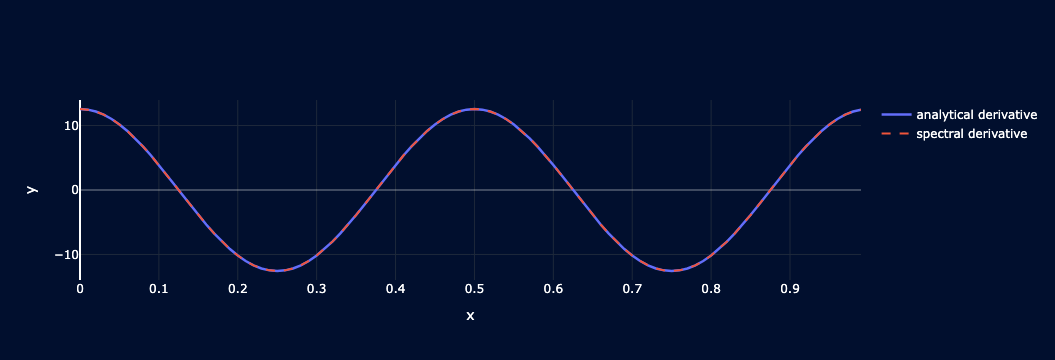

In [32]:
kappa = np.fft.fftshift((2 * np.pi / L) * np.arange(-N/2, N/2))

f_prime_fft_h = np.fft.ifft(1j * kappa * np.fft.fft(f_h)).real

fig = plot_series_pretty(
    x_values=mesh, 
    series_list=[f_prime_h, f_prime_fft_h], 
    labels_list=["analytical derivative", "spectral derivative"]
)

fig.show()

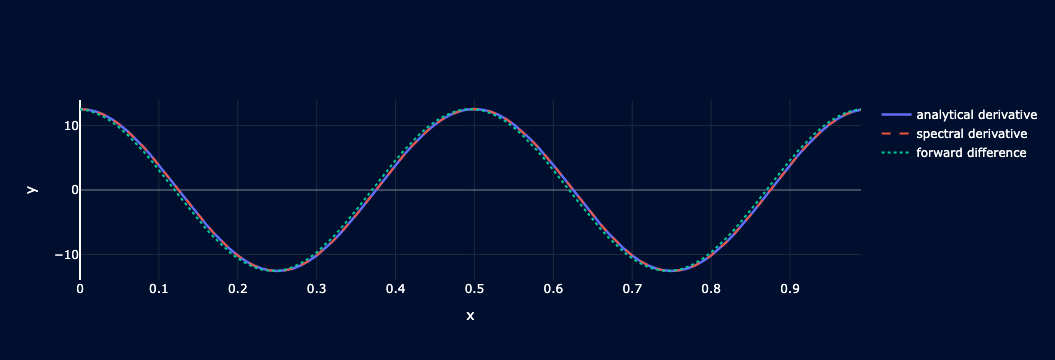

In [30]:
dx = L/N

f_prime_forward = (np.roll(f_h, -1) - f_h) / dx

fig = plot_series_pretty(
    x_values=mesh, 
    series_list=[f_prime_h, f_prime_fft_h, f_prime_forward], 
    labels_list=["analytical derivative", "spectral derivative", "forward difference"]
)

fig.show()

### Convolution kernel

In [33]:
ik = 1j * kappa
d = np.fft.ifft(ik)
d_centered = np.fft.ifftshift(d)

# 2. Perform the literal sliding convolution
# We use 'wrap' because the spectral method assumes the domain is periodic
from scipy.ndimage import convolve1d
f_prime_sliding = convolve1d(f_h, d_centered.real, mode='wrap')

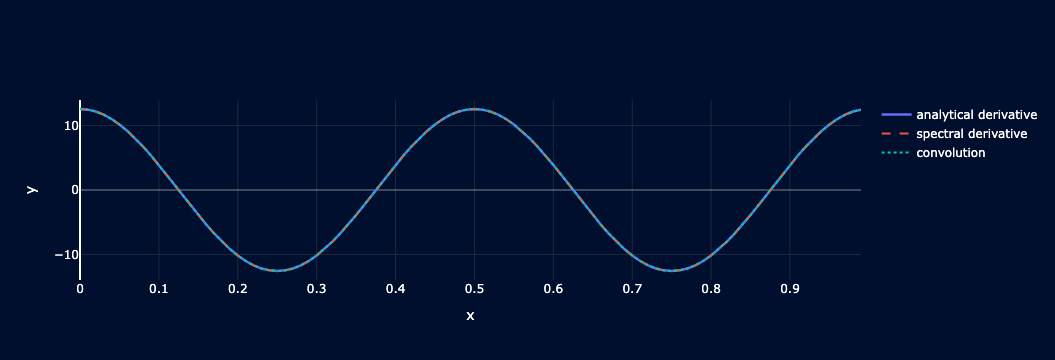

In [35]:
fig = plot_series_pretty(
    x_values=mesh, 
    series_list=[f_prime_h, f_prime_fft_h, f_prime_sliding], 
    labels_list=["analytical derivative", "spectral derivative", "convolution"]
)

fig.show()


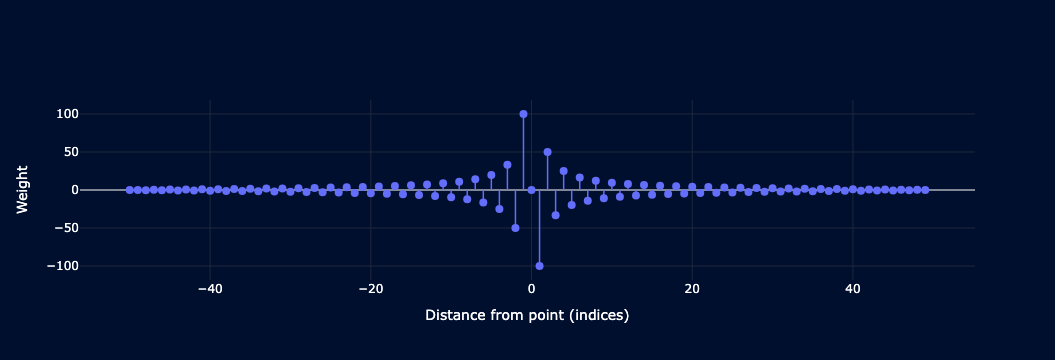

In [39]:
def plot_stem_series(x_values, y_values, label="Weights"):
    """
    Creates a stem plot using Plotly with custom styling.
    """
    fig = go.Figure()

    # Create the stem plot using error_y for the vertical lines
    fig.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='markers',
        name=label,
        marker=dict(color='#636EFA', size=8),
        error_y=dict(
            type='data',
            symmetric=False,
            array=[0] * len(y_values),        # No error above the marker
            arrayminus=y_values,              # Error line goes down to 0
            width=0,                          # No horizontal cap at the end of the stem
            thickness=1.5,
            color='#636EFA'
        )
    ))

    fig.update_layout(
        paper_bgcolor='#010f2e',
        plot_bgcolor='#010f2e',
        font=dict(color='white'),
        xaxis=dict(
            title="Distance from point (indices)",
            gridcolor='#1e293b',
            zeroline=False,
        ),
        yaxis=dict(
            title="Weight",
            gridcolor='#1e293b',
            zerolinecolor='white',
            zerolinewidth=1
        ),
        showlegend=False
    )
    
    return fig

stencil_x_axis = np.arange(-N//2, N//2)

fig = plot_stem_series(stencil_x_axis, d_centered.real)
fig.show()